<a href="https://colab.research.google.com/github/Rgarlay/PWSkills_Assignments/blob/main/Assignment%3A%20Decision%20Trees/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Theory Questions

####1. What is Decision Tree, and how does it work?


In context of Machine Learning, Decision tree is a supervised learning algorithm that used for classification and regression tasks.

It works by splitting data from node into branches, based on feature value, creating a tree like structure.

It starts with all the data, picks the best feature to split on, depending on its criteria.
Then it splits the data from that feature, and iterates the process again until all the model maximum depth is reached.




####2. What are impurity measures in Decision Trees.

In Decision Trees, impurity measures how well the feature splits the data. THe goal at each step is to get best split, which is quantized by minimum impurity, thus making the child mode as pure as possible.

We have 2 core impurity measures:


*   Gini Impurity
*   Entropy



####3. What is the mathematical formula for Gini Impurity.

Gini = 1 - $\sum_{i=1}^{C}p_{i}^{2}$

* Where $p_{i}$ is the probability of class $i$
* $C$ is the number of classes

####4. What is the mathematical formula for Entropy?


$Entropy = -\sum_{i=1}^{C}p_{i}log_{2}(p_{i})$

Where $p_{i}$ is the probability of class $i$..

####5. What is Information Gain, and how is it used in Decision Trees?

Information gain is the reduction in entropy achieved by th epartition of the parent node into children nodes.

Information Gain = Entropy(parent) - weighted entropy (after split)

In context of Decision Trees,
* Information gain ensures that tree prioritizes learning the most useful patterns first.
* Early Split divides data in the meaningful ways.

####6. What is the difference between Gini Impurity and Entropy.

Gini impurity is the probability of misclassifying a randomly chosen element in a set.
Entropy measures the amount of uncertainty or randomness in a set.

Gini impurity works on a linear scale.
Entropy works on a logrithmic scale.

The range of gini index is 0 to 0.5 .
The range of entropy is 0 to $log_{2}(C)$
where C is the number of classes.

Gini impurity is affected by distribution of clases in the dataset.
Entropy is sensitive to number of classes.


####7. What is the mathematical explanation behind Decision Trees.

Inititally, we have out dataset with our independent feature and target variable.

Then we define our loss function for regresison/classification.(as Gini impurity and Entorpy formulas are listed above).

$Entropy = -\sum_{i=1}^{C}p_{i}log_{2}(p_{i})$

Gini = 1 - $\sum_{i=1}^{C}p_{i}^{2}$


For regression, loss function may be  MSR, RMSE, MSE etc.


Then based on that we split our Decision tree to the most meaning information.

We proceed and reiterate the process again and again for the all successive node until:


*   No more further split can happen.
*   Further split provide no meaningful information.

Thus our model is trained.


####8. What is Pre-Pruning in Decision Trees?

Pre-Pruning in Decision Trees is a technique used to stop the tree from growing too deep during its construction, in order to prevent overfitting.

Instead of letting the tree grow to its full depth, we cut the branches off of the tree as we are developing the model.



####9. What is Post-Pruning in Decision Trees?

Post pruning is also done in order to prevent overfitting of the model onto training data.


But instead of deleting the child nodes during the model building process, we allow the tree to fully develop to its max depth.


Then we prune the unnecessary branches and restrict the tree to a balance of maximum information gain and leasst amount of unncecessary depth.

####10. What is the difference between Pre-Pruning and Post-Pruning?

Pre-pruning is applied during the building of the model.
Post pruning happens after the model is built to its full depth.

Pre-pruning focuses on reducing overfitting.
Post pruning focuses on simplifying the model.

Pre pruning uses criteria to remove brances.
Post pruning removes branches that have low perdicting power.


####11. What is a Decision Tree Regressor?

Decision Tree regressor is a regression algorithm where we use Decision trees to predict continuous numerical values.

It can model non-linear behaviors, but is prone to overfitting.

A Decision Tree Regressor splits the data into parts based on feature values to reduce prediction errors. It keeps dividing the data into smaller groups until reaching leaf nodes, where it predicts the average target value for that group.

####12. What are the advantages and disadvantages of Decision Trees	?

**Advantage:**
They are intuitive and thus easy to undersatnd.

They can handle both categorical and numerical data.

They require almost no data preprocessing.

They can capture non-linear relationships.

**Distadvantages:**

They are very much likely to overfit unless hyperparametrized.

They are highly sensitive to data shifts. Even small change in data can cause tree to become unstable.

They are biased towards dominant classes.

####13. How does a Decision Tree handle missing values?

In Decision Trees, empty values are handled by:


*   Ignoring the values during the model budilding.
*   Using the "surrogate" feature, where if 2 feature give the same information in split, and one feature has null values,, the algorithm jumps to the second feature.
* We can deal with it explicitly by imputing or removing from training dataset altogather.



####14. How does a Decision Tree handle categorical features?



1.   If we label encode the categorical data, the decision tree can naturally interpret the encoded values as ordinal in its analysis.
2.   One Hot Encoding allows Decision trees to deal with nominal data.
3. It can directly take cateogorical data and use that in deciding the split as well.



####15. What are some real-world applications of Decision Trees?

It is a ML algorithm that is also the basis of enesmble techniques such as XGBoost, Random Forest etc, which are powerful algorithms and are used in various models.

For example:


*   It can be used in Fraud detection.
*   It can be used in recoganizing the symptoms of disease.
* It is used in building recommendation systems.



# Practical Questions

####1. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy?

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 1.0


####2. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances.

In [2]:
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

importances = clf.feature_importances_
for feature, importance in zip(iris.feature_names, importances):
    print(f"{feature}: {importance}")

sepal length (cm): 0.0
sepal width (cm): 0.016670139612419255
petal length (cm): 0.9061433868879218
petal width (cm): 0.07718647349965893


####3. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy?

In [3]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 1.0


####4. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)?

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.495235205629094


####5.  Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz?

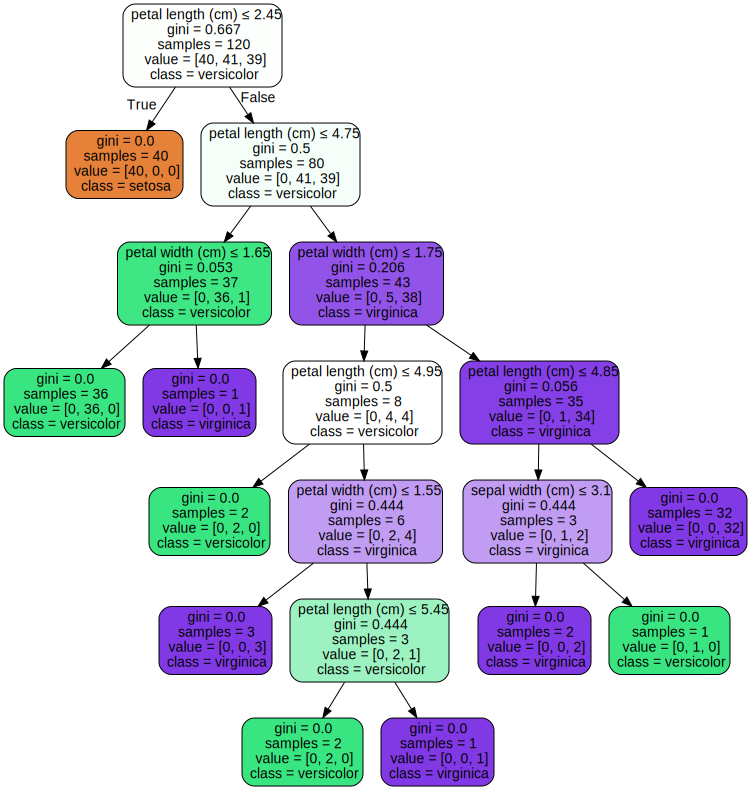

In [7]:
from sklearn.tree import export_graphviz
import graphviz

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

dot_data = export_graphviz(
    clf, out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True, rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree")
graph.view()
graph = graphviz.Source(dot_data)
graph

####6. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree.

In [8]:
clf_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_limited.fit(X_train, y_train)
y_pred_limited = clf_limited.predict(X_test)
accuracy_limited = accuracy_score(y_test, y_pred_limited)

clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)
y_pred_full = clf_full.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)

print(f"Accuracy with max depth 3: {accuracy_limited}")
print(f"Accuracy with full depth: {accuracy_full}")

Accuracy with max depth 3: 1.0
Accuracy with full depth: 1.0


####7. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree.

In [9]:
clf_min_samples = DecisionTreeClassifier(min_samples_split=5, random_state=42)
clf_min_samples.fit(X_train, y_train)
y_pred_min_samples = clf_min_samples.predict(X_test)
accuracy_min_samples = accuracy_score(y_test, y_pred_min_samples)

clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)

print(f"Accuracy with min_samples_split=5: {accuracy_min_samples}")
print(f"Accuracy with default min_samples_split: {accuracy_default}")

Accuracy with min_samples_split=5: 1.0
Accuracy with default min_samples_split: 1.0


####8. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data.

In [10]:
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_scaled = DecisionTreeClassifier(random_state=42)
clf_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = clf_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

clf_unscaled = DecisionTreeClassifier(random_state=42)
clf_unscaled.fit(X_train, y_train)
y_pred_unscaled = clf_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

print(f"Accuracy with scaled features: {accuracy_scaled}")
print(f"Accuracy with unscaled features: {accuracy_unscaled}")

Accuracy with scaled features: 1.0
Accuracy with unscaled features: 1.0


####9. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification.

In [12]:
from sklearn.multiclass import OneVsRestClassifier


iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy using OvR strategy:", accuracy)

Model Accuracy using OvR strategy: 1.0


####10. Write a Python program to train a Decision Tree Classifier and display the feature importance scores.

In [13]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

importances = clf.feature_importances_
for feature, importance in zip(iris.feature_names, importances):
    print(f"{feature}: {importance}")

sepal length (cm): 0.013333333333333329
sepal width (cm): 0.0
petal length (cm): 0.5640559581320451
petal width (cm): 0.4226107085346215


####11. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree.

In [14]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

regressor_limited = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor_limited.fit(X_train, y_train)
y_pred_limited = regressor_limited.predict(X_test)
mse_limited = mean_squared_error(y_test, y_pred_limited)

regressor_full = DecisionTreeRegressor(random_state=42)
regressor_full.fit(X_train, y_train)
y_pred_full = regressor_full.predict(X_test)
mse_full = mean_squared_error(y_test, y_pred_full)

print(f"MSE with max_depth=5: {mse_limited}")
print(f"MSE with unrestricted depth: {mse_full}")

MSE with max_depth=5: 0.5245146178314735
MSE with unrestricted depth: 0.495235205629094


####12. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy.

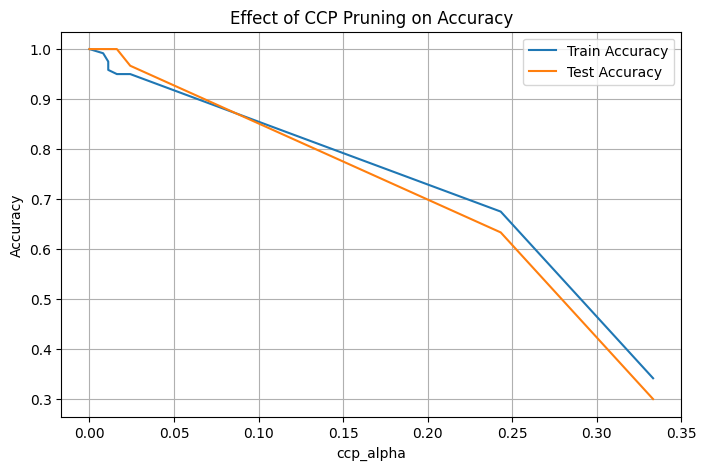

In [17]:
import matplotlib.pyplot as plt

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

train_accuracies = []
test_accuracies = []

for ccp_alpha in ccp_alphas:
    clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_pruned.fit(X_train, y_train)
    train_accuracies.append(clf_pruned.score(X_train, y_train))
    test_accuracies.append(clf_pruned.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(ccp_alphas, train_accuracies, label='Train Accuracy')
plt.plot(ccp_alphas, test_accuracies, label='Test Accuracy')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Effect of CCP Pruning on Accuracy')
plt.legend()
plt.grid(True)
plt.show()

####13. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score.

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Precision: 1.0
Recall: 1.0
F1-Score: 1.0


####14. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn.

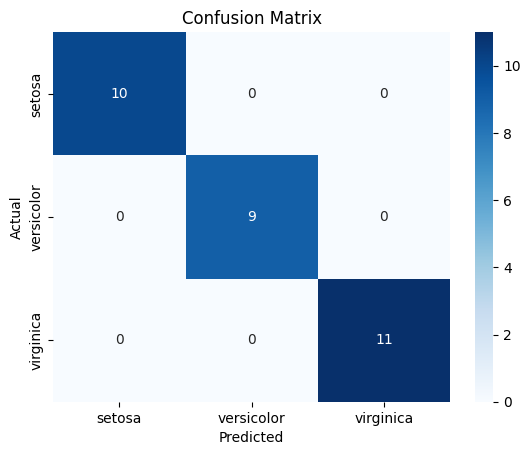

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

####15. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split.

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10]
}

clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters: {'max_depth': 4, 'min_samples_split': 2}
Best cross-validation accuracy: 0.9416666666666668
